# Final Project

## By Adia Redd and Tiffany Tang

**Project Description**: For the final project, students are required to read the primary literature, identify a biological problem and the available datasets to work with (these data may be your own) and undertake a computational analysis to tackle the problem

In [3]:
# read in the data and take a look at it

import pandas as pd

# change path to fit your needs
file_path = r"C:\Users\tiffa\Machine_Learning_Final\ML\Final\cleaned_coffee.csv"

#file_path = Adia put your file path for the cleaned version here

# Read the CSV
df = pd.read_csv(file_path, sep = ';') # semicolon delimited file

# Take a quick look at the data
print(df.head())

   ID  codigo_ibg  uf regions     pib           species  PRD.mean  yield.mean  \
0   1     2900900  BA    CSul   29921  Coffea canephora       1.0   20.555556   
1   2     2902252  BA    CSul   60596  Coffea canephora       1.0   28.455556   
2   3     2902906  BA     Per  244891    Coffea arabica       0.3   17.661111   
3   4     2904803  BA     Per   42476    Coffea arabica       0.3   10.000000   
4   5     2905602  BA    CSul  167352  Coffea canephora       1.0   18.377778   

       FC_m     FC2km  ...  mTemp_warmq.mean  mTemp_coldq.mean  \
0  0.459667  0.729333  ...         24.100000         21.588889   
1  0.882000  0.782333  ...         25.970370         23.340741   
2  0.175000  0.137333  ...         22.643026         19.831560   
3  0.166333  0.058333  ...         25.460317         22.507937   
4  0.745333  0.639333  ...         26.650793         23.841270   

   prep_annual.mean  prep_wm.mean  prep_dm.mean  prep_season.mean  \
0       1298.733333    221.133333     21.833333

In [ ]:
df.columns  # just want to take a look


Index(['ID', 'codigo_ibg', 'uf', 'regions', 'pib', 'species', 'PRD.mean',
       'yield.mean', 'FC_m', 'FC2km', 'FC500m', 'PollinatorD', 'EUdist',
       'patchD', 'CC', 'CC_ha', 'CC2km', 'CC500m', 'CC_m', 'farm_size',
       'EUdist.mean', 'patch.density.x.mean', 'farm_size_mean.mean',
       'honey_kg.mean', 'LUD.mean', 'coffee_Tassistane_P', 'mechanic_harvest',
       'coffee_irrigation_P', 'ncoffee_FertiOrg_P', 'coffee_agrotox_P',
       'coffee_familiar_P', 'x', 'y', 'elevation_f', 'temp_annual.mean',
       'isoterm.mean', 'temp_season.mean', 'maxTemp_wm.mean',
       'minTemp_cm.mean', 'temp_range.mean', 'mTemp_wq.mean', 'mTemp_dq.mean',
       'mTemp_warmq.mean', 'mTemp_coldq.mean', 'prep_annual.mean',
       'prep_wm.mean', 'prep_dm.mean', 'prep_season.mean', 'prep_wq.mean',
       'prep_dq.mean', 'prep_warmq.mean', 'prep_cold.mean'],
      dtype='object')

## First Run PCA to see which data points are most important

In [5]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data has to be numeric!
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

print("Number of numeric variables:", numeric_df.shape[1])
print("Number of observations:", numeric_df.shape[0])

# scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Run the PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio for each component
explained_var = pca.explained_variance_ratio_

# Display first few
for i, var in enumerate(explained_var[:10]):
    print(f"PC{i+1}: {var:.2%} of variance")


Number of numeric variables: 49
Number of observations: 610
PC1: 25.23% of variance
PC2: 22.67% of variance
PC3: 7.80% of variance
PC4: 7.61% of variance
PC5: 5.49% of variance
PC6: 3.55% of variance
PC7: 3.17% of variance
PC8: 2.92% of variance
PC9: 2.36% of variance
PC10: 2.08% of variance


In [7]:
# Lets check out which features the first 2 are 
# since they explain almost 50% of the variance
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numeric_df.columns
)

# Top features contributing to PC1
top_features_PC1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
print("Top features contributing to PC1:")
print(top_features_PC1)

print('\n') # line break
# Top 10 features contributing to PC2
top_features_PC2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)
print("Top features contributing to PC2:")
print(top_features_PC2)


Top features contributing to PC1:
x                       0.222432
CC500m                  0.219977
codigo_ibg              0.217956
EUdist.mean             0.217719
EUdist                  0.217719
ID                      0.206134
prep_season.mean        0.200843
CC2km                   0.197363
patchD                  0.193742
patch.density.x.mean    0.193742
Name: PC1, dtype: float64


Top features contributing to PC2:
minTemp_cm.mean     0.292145
mTemp_dq.mean       0.256672
temp_range.mean     0.248319
temp_annual.mean    0.243424
prep_warmq.mean     0.239373
mTemp_coldq.mean    0.233074
y                   0.232847
PRD.mean            0.232192
PollinatorD         0.232192
elevation_f         0.199173
Name: PC2, dtype: float64


I will try to plot the original features to show which features contribute most to the main components that explain the most variance.

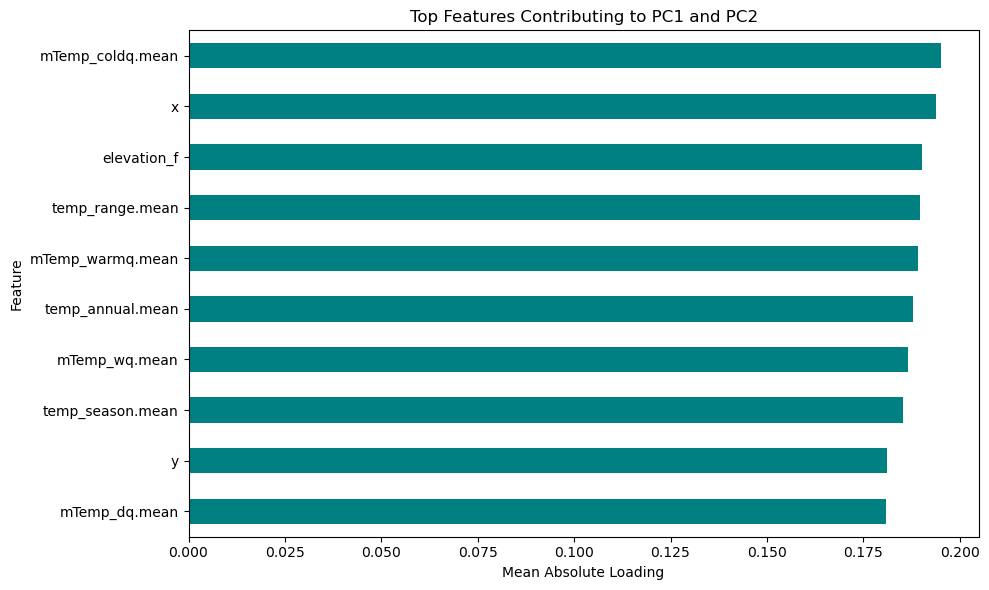

In [9]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt


# Pick the first two components as they explain nearly 50% of the variance
top_PC = ['PC1', 'PC2']

# Calculate the mean absolute loading across the top PCs
mean_loadings = loadings[top_PC].abs().mean(axis=1)

# Sort and take the top features
top_features = mean_loadings.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top Features Contributing to PC1 and PC2')
plt.xlabel('Mean Absolute Loading')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


These look to be the top 10 features contributing to PC1 and PC2